In [64]:
import pandas as pd
from matplotlib import pyplot as plt

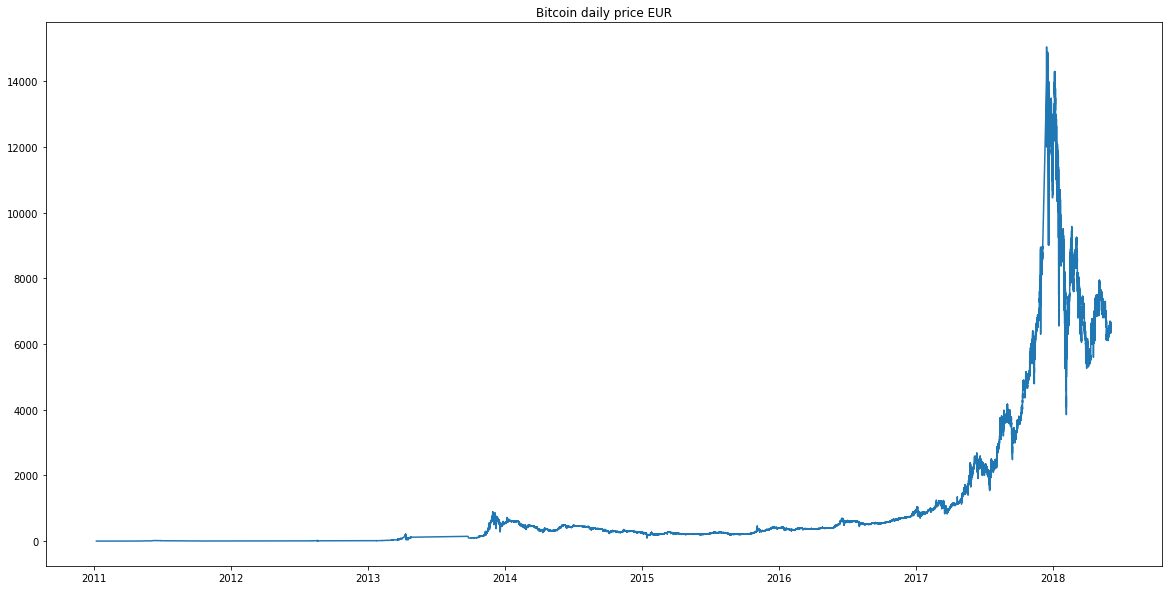

In [65]:
# Download desired csv from 'http://api.bitcoincharts.com/v1/csv/'

# Columns names are time, price, volume. Rename p/v to y to predict.

path='http://api.bitcoincharts.com/v1/csv/bcEUR.csv.gz'
df = pd.read_csv('bceur.csv', names=['t','p','v'])
df['ds']=pd.to_datetime(df['t'],unit='s')
# Set the date/time to be the index for the dataframe
df=df.drop(df.index[0:2])
#df=df.drop(df.index[-2:])
df.set_index('ds', inplace=True)

#Specify range!

df=df[:]

#ax = df['y'][:].plot(title="Bitcoin daily price EUR")
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.figure(figsize=(20,10)) 
plt.plot(df['p'])
plt.title('Bitcoin daily price EUR')
plt.show()

In [ ]:
import datetime
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

def fracDate(year):
    return str(int(year))+'-'+str(int((year-int(year))*12)+1)

app=dash.Dash()

app.layout = html.Div(children=[
    html.H1(children='BTC/EUR'),

    html.Div(id='time-range'),

    dcc.RangeSlider(
        id='year-slider',
        min=min(df.index).year+(min(df.index).month+1)/12,
        max=max(df.index).year+(max(df.index).month+1)/12,
        step=0.08,
        value = [2015,2016.5]
    ),

    html.Div(id='output-graph1'),
    html.Div(id='output-graph2')
])

@app.callback(
    Output(component_id='time-range', component_property='children'),
    [Input(component_id='year-slider', component_property='value')]
)
def update_time(input_data):

    return     html.Div(id='timerange',children='Timerange:\t'+str(fracDate(input_data[0]))+' - '+ str(fracDate(input_data[1])))

@app.callback(
    Output(component_id='output-graph1', component_property='children'),
    [Input(component_id='year-slider', component_property='value')]
)
def update_g1(input_data):

    return     dcc.Graph(
        id='graph1',
        figure={
            'data': [
                {'x':df[fracDate(input_data[0]):fracDate(input_data[1])].index, 'y': df[fracDate(input_data[0]):fracDate(input_data[1])].p, 'type': 'line', 'name': 'volume' },
            ],
            'layout': {
                'title':'Price'
            }
            
        })

@app.callback(
    Output(component_id='output-graph2', component_property='children'),
    [Input(component_id='year-slider', component_property='value')]
)
def update_g2(input_data):


    return     dcc.Graph(
        id='graph2',
        figure={
            'data': [
                {'x':df[fracDate(input_data[0]):fracDate(input_data[1])].index, 'y': df[fracDate(input_data[0]):fracDate(input_data[1])].v, 'type': 'line', 'name': 'volume' },
            ],
            'layout': {
                'title':'Volume'
            }
            
        })

if __name__ == '__main__':
    app.run_server(debug=False, port = 8054)

 * Running on http://127.0.0.1:8054/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Jun/2018 17:33:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2018 17:34:31] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2018 17:34:31] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2018 17:34:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2018 17:34:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2018 17:34:36] "POST /_dash-update-component HTTP/1.1" 200 -


In [61]:
max(df.index).year+(max(df.index).month+1)/12

2018.5

In [63]:
df.tail()

,t,p,v
ds,,,
2018-05-31 15:45:56,1527781556,6425.02,0.159001
2018-05-31 15:48:47,1527781727,6490.00,0.000023
2018-05-31 15:48:48,1527781728,6521.71,0.022977
2018-05-31 16:20:32,1527783632,6523.28,0.015330
2018-05-31 16:40:40,1527784840,6500.00,0.030000
